In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score

In [2]:
# CCA_top150 connectivity features
CCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/CCA_top150/CCA_U.csv"
CCA_U = pd.read_csv(CCA_U_path, index_col="Row")

# rCCA_top150 connectivity features
rCCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/rCCA_top150/rCCA_U.csv"
rCCA_U = pd.read_csv(rCCA_U_path, index_col="Row")

In [3]:
def hierarchical_cluster(data, num_clusters):
    # Perform hierarchical clustering with the optimal number of clusters
    linkage_matrix = linkage(data, method='ward')
    labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
    return labels, linkage_matrix

def plot_labeled_scatter(axis1, axis2, labels):
    plt.scatter(axis1, axis2, c=labels, cmap='viridis')
    plt.xlabel('CV1')
    plt.ylabel('CV2')
    plt.title('Hierarchical Clustering')
    plt.show()

In [4]:
CCA_labels, CCA_linkage_matrix = hierarchical_cluster(CCA_U[["U1", "U2"]].to_numpy(), 3)
rCCA_labels, rCCA_linkage_matrix = hierarchical_cluster(rCCA_U[["Var1","Var2"]].to_numpy(), 4) # ALSO HAS A 2 CLUSTER SOLN

CCA_labels_df = pd.DataFrame(CCA_labels).set_index(CCA_U.index)
rCCA_labels_df = pd.DataFrame(rCCA_labels).set_index(rCCA_U.index)


In [5]:
CCA_Cluster_ARIs = []
rCCA_Cluster_ARIs = []

bootstraps_dir = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/data/local/clusteringBootstraps"
bootstrap_files = os.listdir(bootstraps_dir)

for bootstrap_file in bootstrap_files:
    bootstrap = pd.read_csv(os.path.join(bootstraps_dir, bootstrap_file), index_col="Row")
    
    # Getting the labels for the subjects that were included in this bootstrap
    subset_CCA_labels = CCA_labels_df.loc[bootstrap.index].to_numpy().T[0]
    subset_rCCA_labels = rCCA_labels_df.loc[bootstrap.index].to_numpy().T[0]
    
    bootstrap_CCA_labels, boootstrap_CCA_linkage_matrix = hierarchical_cluster(bootstrap[["CCA_U1","CCA_U2"]].to_numpy(), 3)
    
    bootstrap_rCCA_labels, boootstrap_rCCA_linkage_matrix = hierarchical_cluster(bootstrap[["rCCA_U1","rCCA_U2"]].to_numpy(), 4)
    
    CCA_Cluster_ARIs.append(adjusted_rand_score(subset_CCA_labels, bootstrap_CCA_labels))
    rCCA_Cluster_ARIs.append(adjusted_rand_score(subset_rCCA_labels, bootstrap_rCCA_labels))

(array([ 11.,  24.,  48.,  72.,  70., 118., 117., 130.,  87.,  77.,  46.,
         32.,  26.,  10.,   7.,   4.,   5.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69]),
 <BarContainer object of 69 artists>)

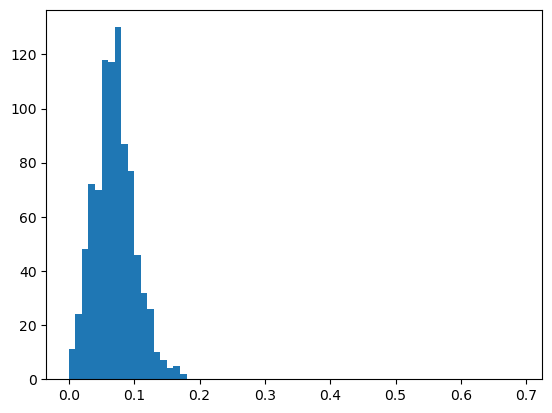

In [9]:
plt.hist(np.array(CCA_Cluster_ARIs), np.arange(0,0.7, 0.01))

(array([196., 163.,  55.,  19.,   6.,   2.,   0.,   2.,   0.,   1.,   0.,
          0.,   2.,   4.,   6.,   2.,   6.,   2.,  14.,  16.,  14.,  16.,
         20.,  17.,   7.,   6.,   7.,   4.,   5.,  13.,  19.,  14.,  17.,
         13.,   5.,  15.,   3.,   7.,   8.,  12.,  10.,   6.,   9.,   8.,
          4.,   6.,   5.,   5.,  11.,  11.,   6.,   8.,   7.,  10.,   7.,
          6.,   4.,   3.,   3.,   7.,   3.,   9.,   2.,   2.,   4.,   3.,
          1.,   1.,   0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69]),
 <BarContainer object of 69 artists>)

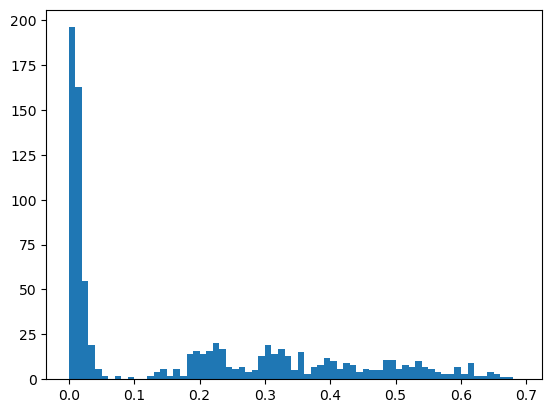

In [8]:
plt.hist(np.array(rCCA_Cluster_ARIs), np.arange(0,0.7, 0.01))